In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from tensorflow.keras.layers import Dense,ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Accuracy,Precision,Recall,F1Score
from tensorflow.keras.optimizers import Adam

pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

2023-09-27 15:16:49.580802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# shape of dataset
df.shape

(569, 32)

In [5]:
# removing id column - unnecessary
df.drop('id',axis=1,inplace=True)

In [6]:
# getting statistics of dataset
df.describe()

# No null values in any columns as all columns value count is 569

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# encoding dignosis (target) using label encoding
lencode = LabelEncoder()
df['diagnosis'] = lencode.fit_transform(df['diagnosis'])

In [8]:
# separating features and labels of dataset
X = df.drop('diagnosis',axis=1)
y = df.diagnosis

In [9]:
# splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=12)

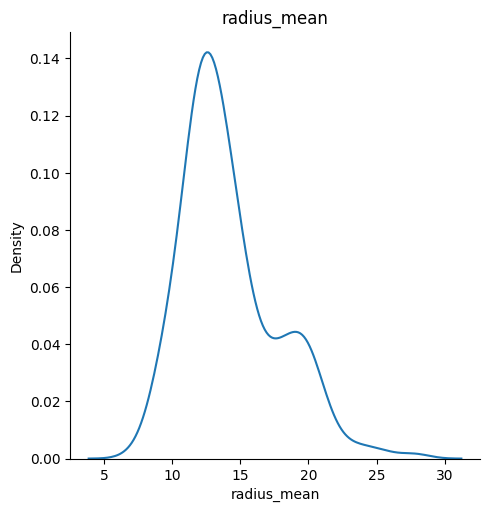

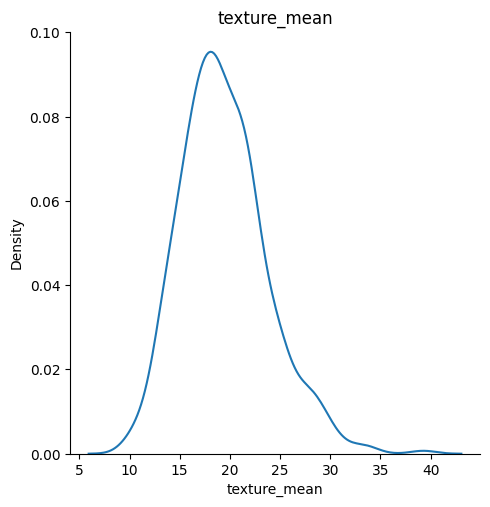

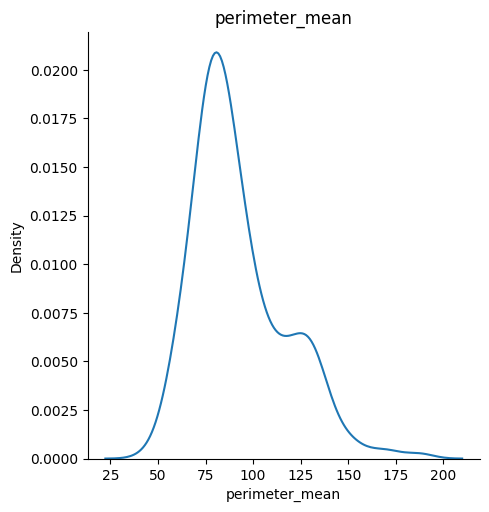

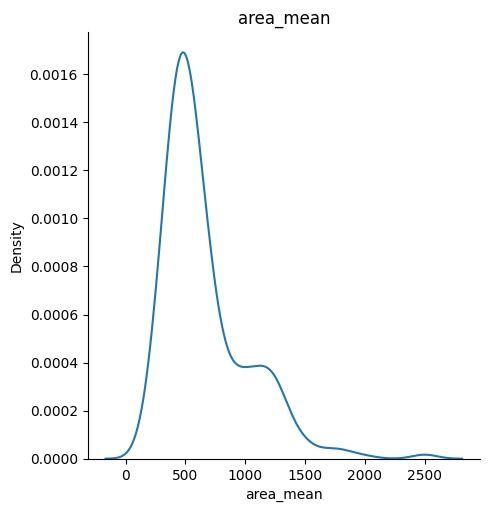

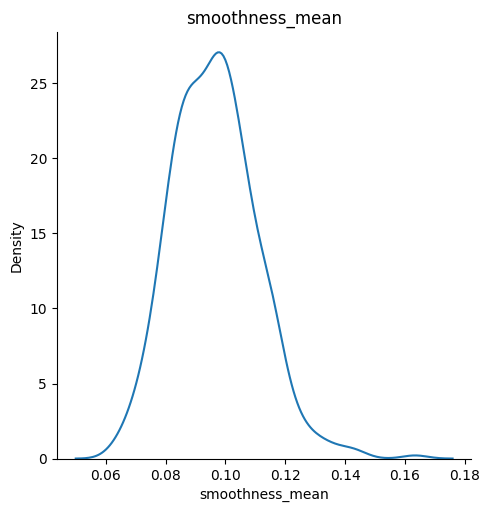

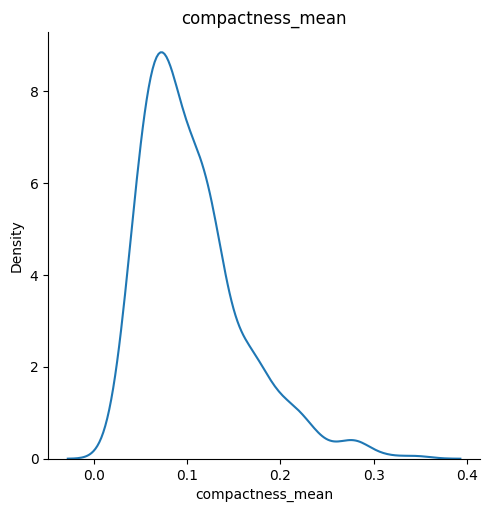

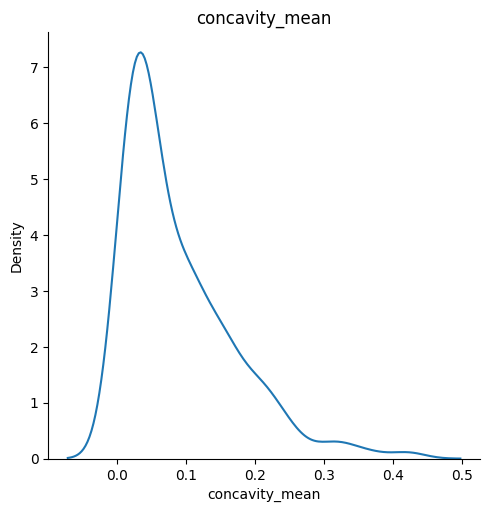

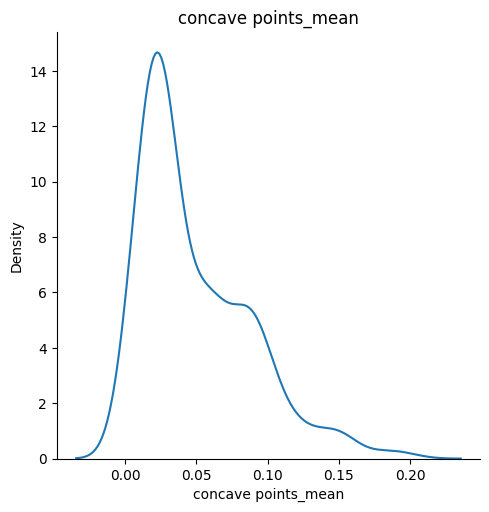

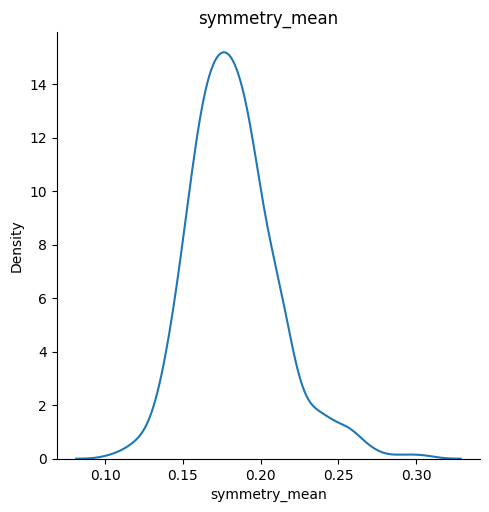

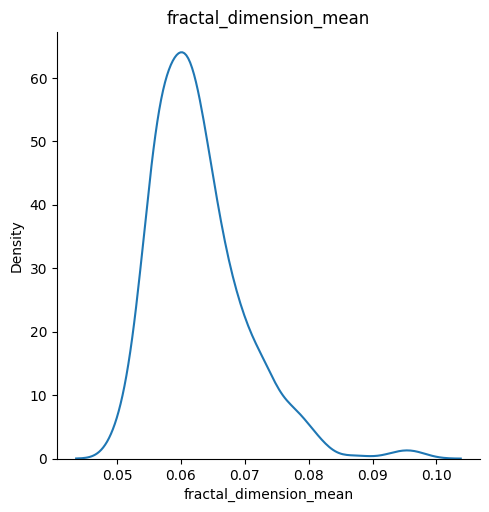

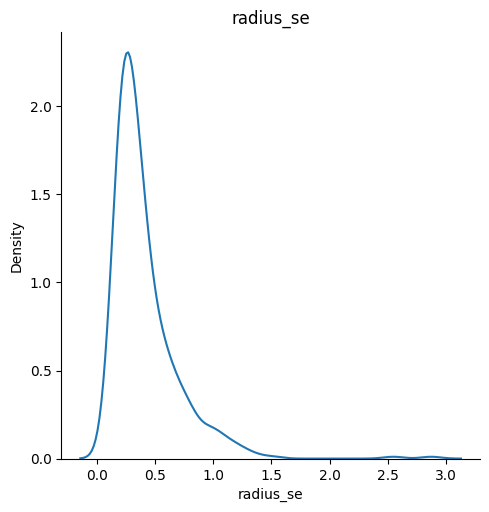

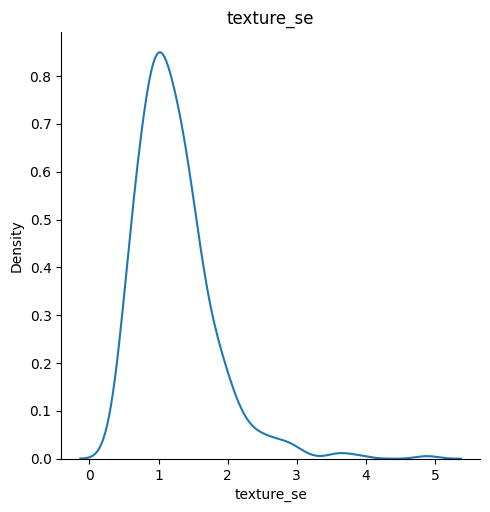

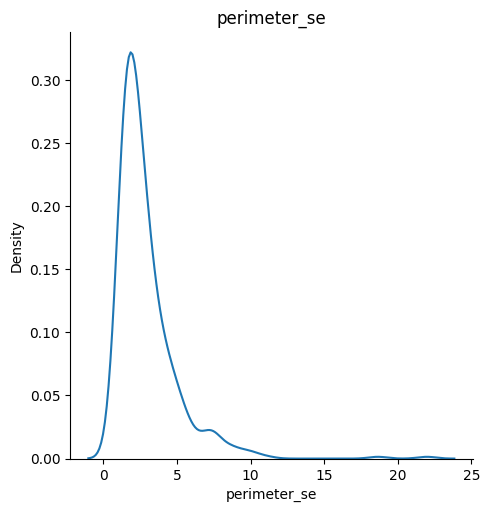

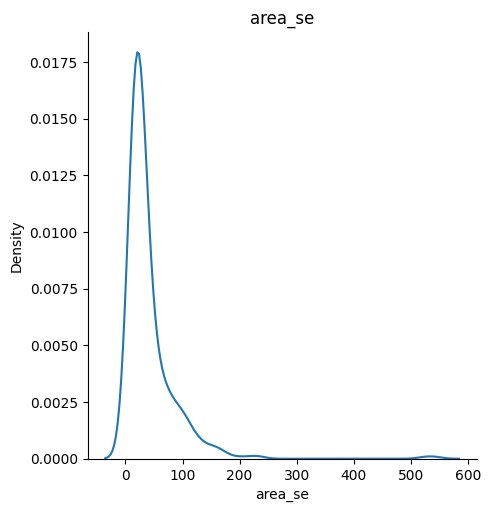

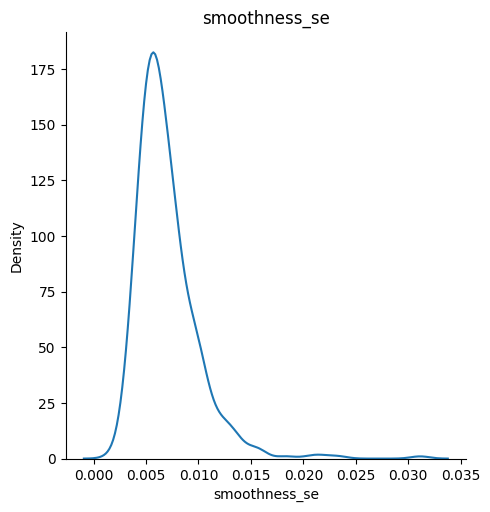

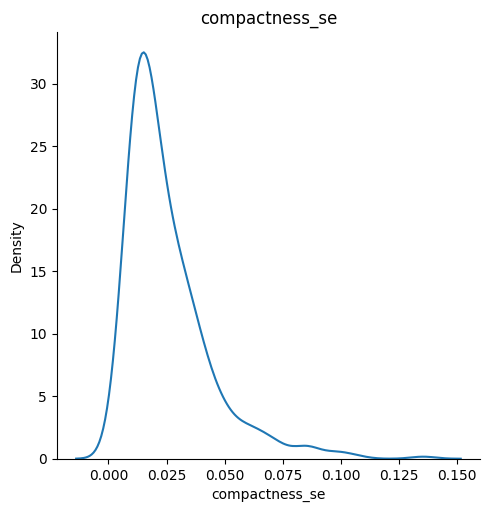

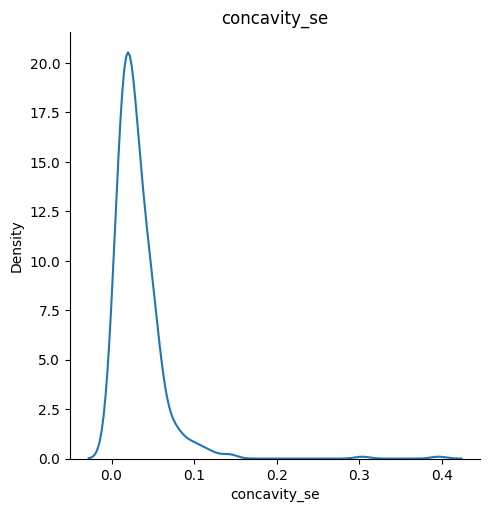

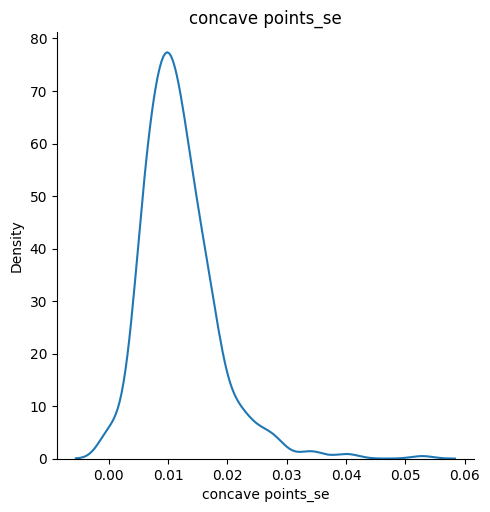

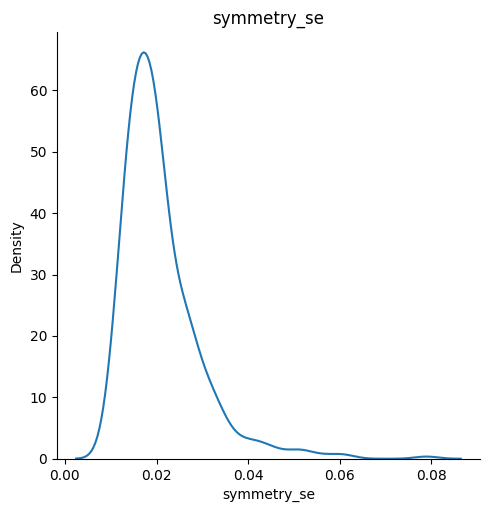

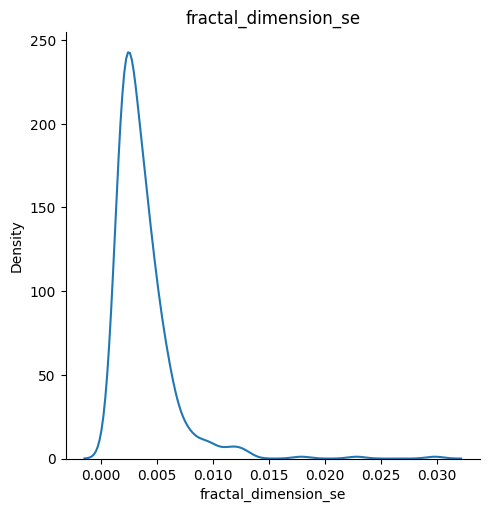

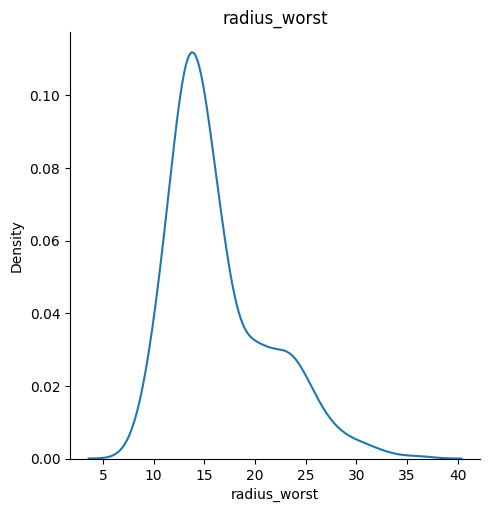

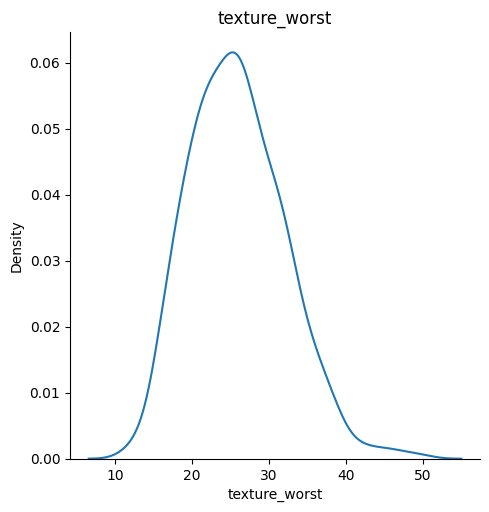

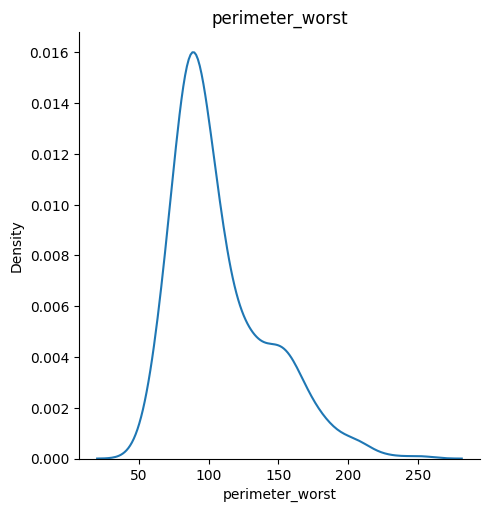

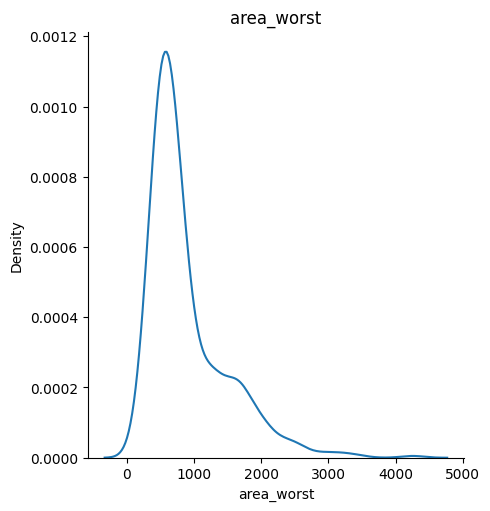

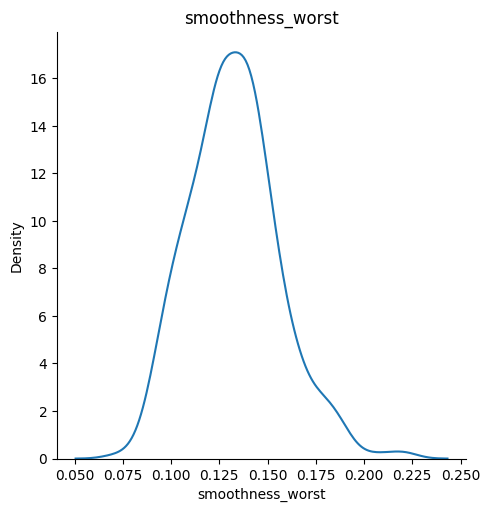

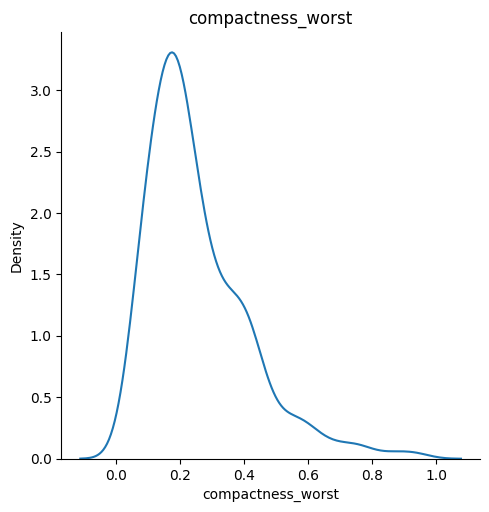

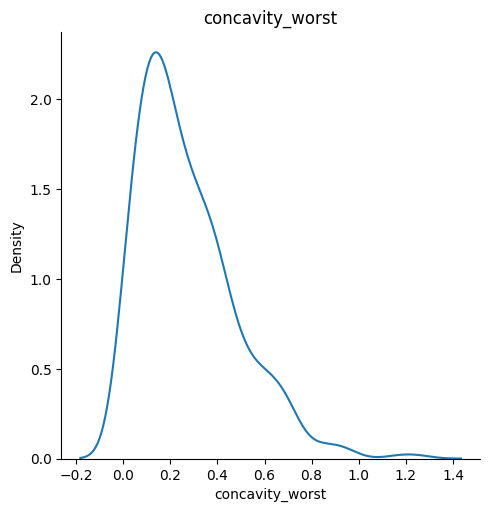

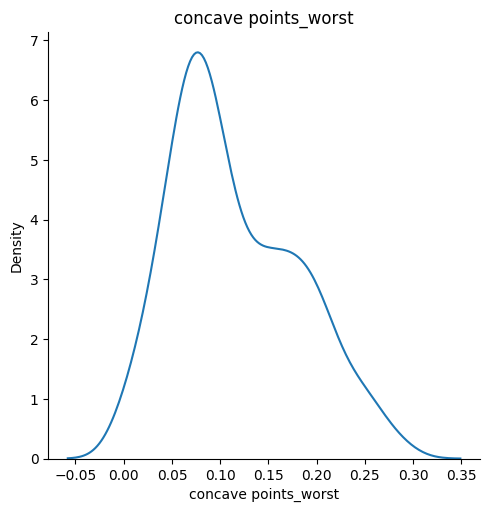

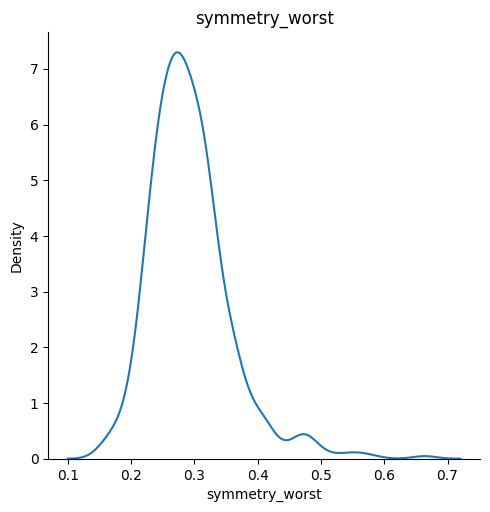

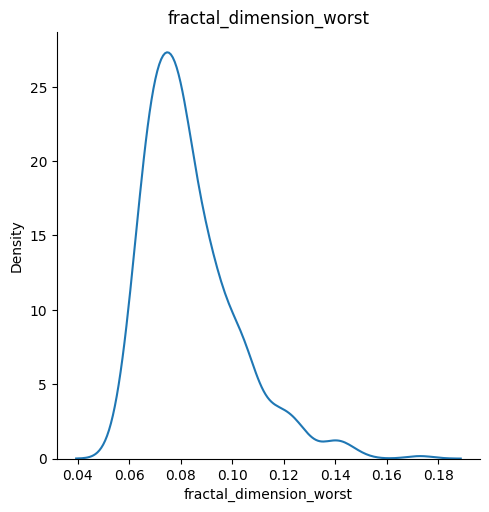

In [10]:
for i in X.columns:
    sns.displot(X_train[i],kind='kde').set(title=i)

In [11]:
# columns which has data right skewed
right_skewed_columns = ['area_mean','concavity_mean','concave points_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','fractal_dimension_se','area_worst','compactness_worst','fractal_dimension_worst']

In [12]:
# log transform for right skewed data
def log_transform(data:pd.DataFrame, columns:list) -> pd.DataFrame:
    data[columns] = pd.DataFrame(np.log(data[columns]))
    return data
    
def sqrt_transformation(data:pd.DataFrame, columns:list) -> pd.DataFrame:
    data[columns] = pd.DataFrame(np.sqrt(data[columns]))
    return data

In [13]:
# we wioll perform sqrt transformation because some of columns have value 0 and less then 0
# log 0 = -inf or or log for less then 0 values are negative, -inf will create problem.
X_train = sqrt_transformation(X_train,right_skewed_columns)

In [14]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
353,15.080,25.74,98.00,26.769385,0.10240,0.09769,0.351426,0.255988,0.1647,0.06464,0.808332,1.227192,2.043037,7.960528,0.102567,0.155917,0.221630,0.017460,0.02120,0.069764,18.51,33.22,121.20,32.403703,0.16600,0.485386,0.4029,0.15260,0.2654,0.307213
62,14.250,22.15,96.42,25.410628,0.10490,0.20080,0.462061,0.294160,0.1949,0.07292,0.838809,1.126055,2.317973,7.796153,0.096990,0.265631,0.262659,0.018480,0.01700,0.078186,17.67,29.51,119.10,30.975797,0.16400,0.790380,0.6922,0.17850,0.2844,0.336452
567,20.600,29.33,140.10,35.566838,0.11780,0.27700,0.592790,0.389872,0.2397,0.07016,0.852056,1.262933,2.402499,9.285473,0.080759,0.248153,0.266777,0.016640,0.02324,0.078645,25.74,39.42,184.60,42.673177,0.16500,0.931719,0.9387,0.26500,0.4087,0.352136
231,11.320,27.08,71.76,19.892210,0.06883,0.03813,0.127789,0.055902,0.1869,0.05628,0.347851,0.944828,1.029077,2.933428,0.060440,0.128335,0.127789,0.003125,0.01537,0.045299,12.08,33.75,79.82,21.267346,0.09203,0.378418,0.1089,0.02083,0.2849,0.266214
451,19.590,25.00,127.70,34.510868,0.10320,0.09871,0.406817,0.301048,0.1663,0.05391,0.683667,1.172604,1.707630,7.495332,0.109087,0.138888,0.221517,0.014990,0.01641,0.042509,21.44,30.96,139.80,37.696154,0.15280,0.429535,0.3977,0.14660,0.2293,0.246800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,11.800,17.26,75.26,20.782204,0.09087,0.06232,0.168908,0.127984,0.1847,0.06019,0.586345,1.067708,1.491643,5.005996,0.073912,0.140143,0.144187,0.005398,0.01477,0.055417,13.45,24.49,86.00,23.706539,0.12440,0.415452,0.1449,0.05356,0.2779,0.284974
107,12.360,18.54,79.01,21.603240,0.08477,0.06815,0.162573,0.138600,0.1602,0.06066,0.346266,0.945727,0.921086,3.037598,0.058796,0.102323,0.108028,0.005558,0.01251,0.036824,13.29,27.49,85.56,23.325951,0.11840,0.443058,0.1937,0.08442,0.2983,0.268049
248,10.650,25.22,68.01,18.627936,0.09657,0.07234,0.154240,0.127083,0.1897,0.06329,0.499700,1.221884,1.223520,4.079216,0.084788,0.101735,0.103971,0.006245,0.02158,0.051176,12.25,35.19,77.98,21.347131,0.14990,0.373898,0.1125,0.06136,0.3409,0.285430
63,9.173,13.86,59.20,16.152399,0.07721,0.08751,0.244704,0.147648,0.2341,0.06963,0.640156,1.504992,1.614930,4.849742,0.093477,0.198444,0.207654,0.015600,0.04192,0.076302,10.01,19.23,65.59,17.609656,0.09836,0.409634,0.1397,0.05087,0.3282,0.291376


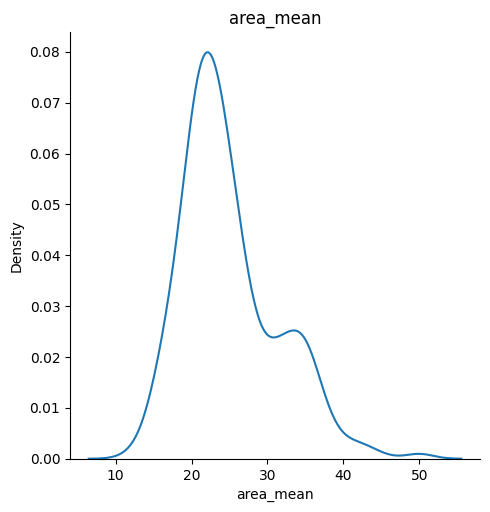

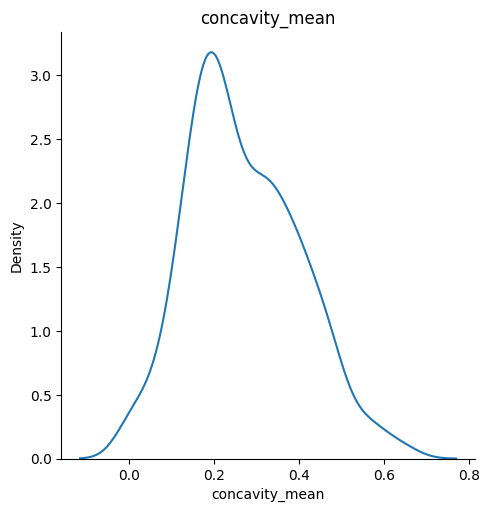

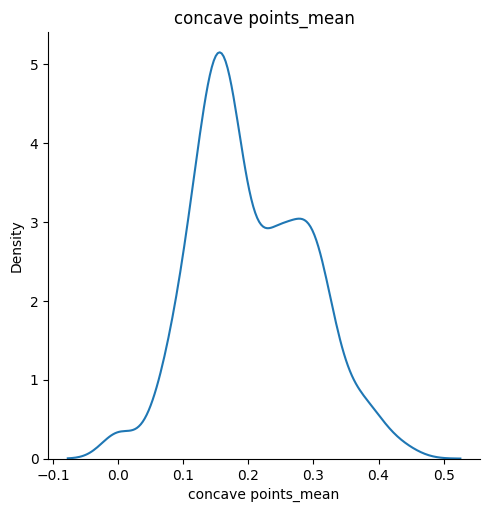

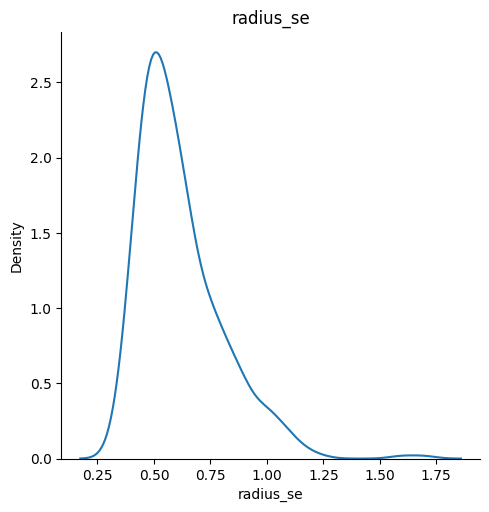

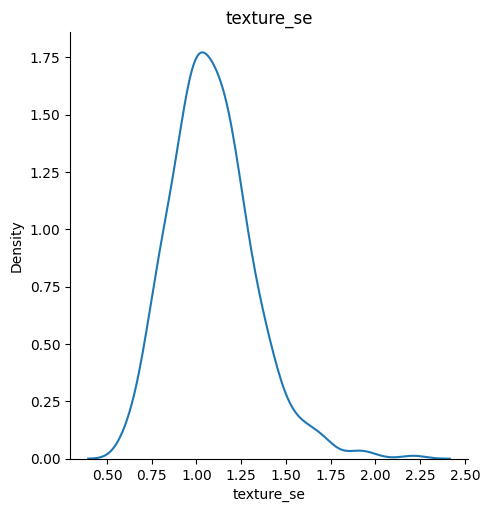

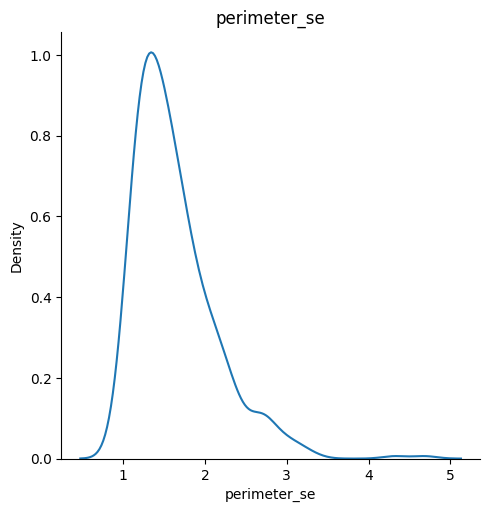

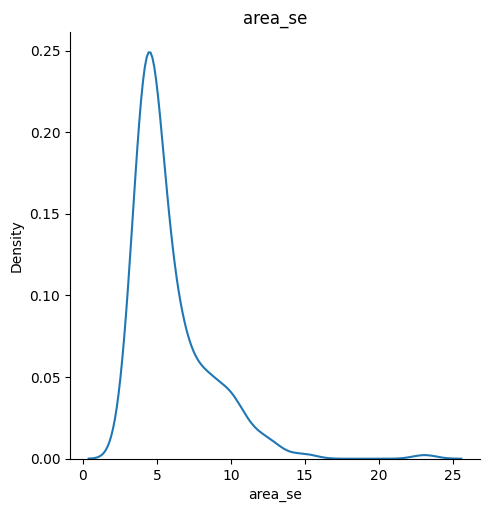

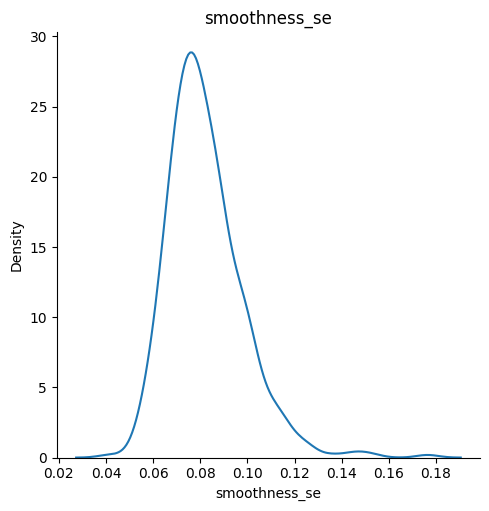

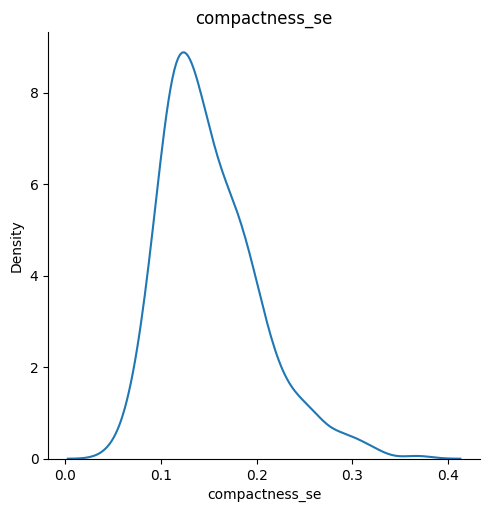

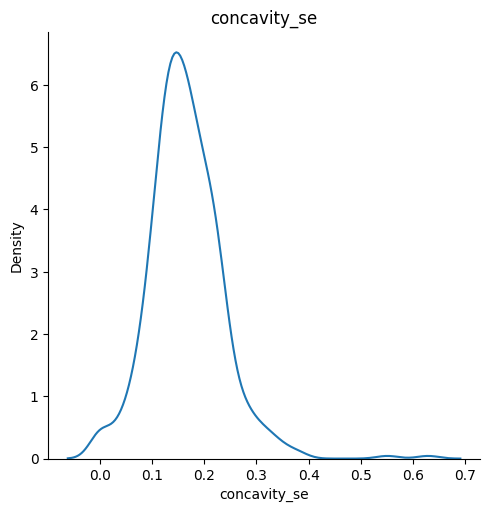

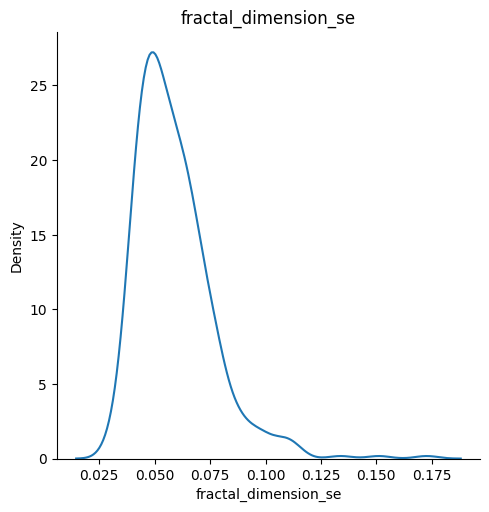

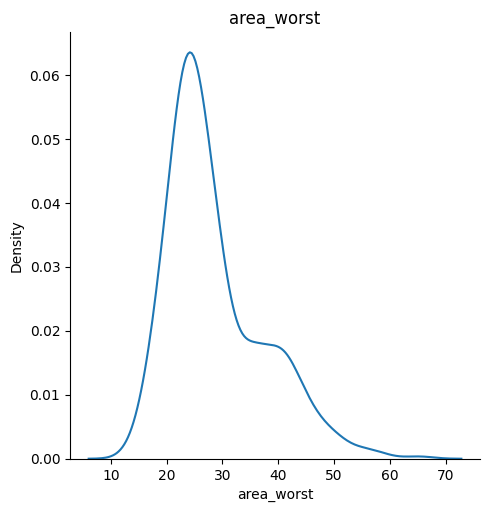

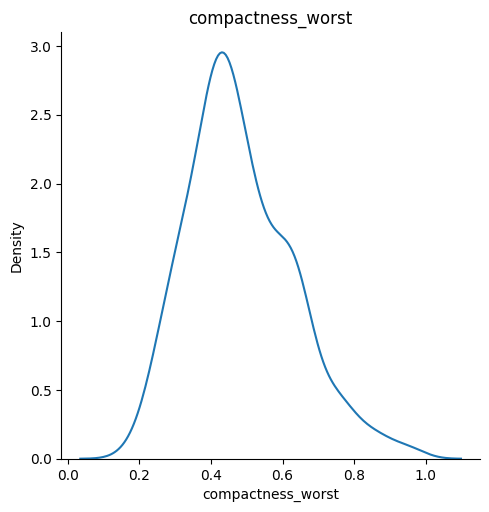

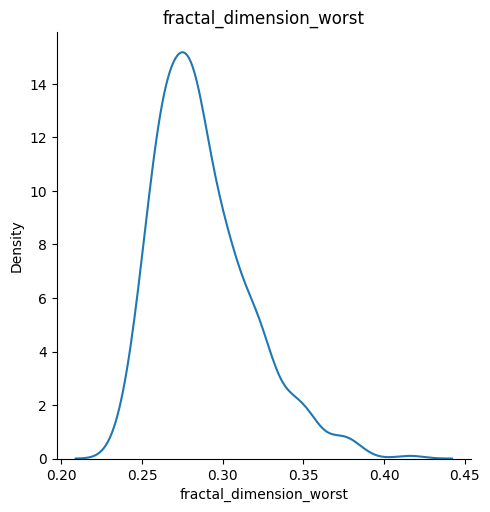

In [15]:
# checking if distribution of right skewed column is getting normal or not
for i in right_skewed_columns:
    sns.displot(X_train[i],kind='kde').set(title=i)
    
# Most of columns are now near normally distributed

In [16]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.187501,19.419956,92.374374,24.923584,0.096423,0.104834,0.268463,0.203931,0.182521,0.062708,0.615749,1.085907,1.634270,5.907253,0.082169,0.151500,0.164879,0.011880,0.020899,0.058825,16.382033,25.888527,107.995275,28.643591,0.132480,0.482108,0.271400,0.115169,0.292990,0.287692
std,3.526849,4.294924,24.345264,6.280204,0.014207,0.054093,0.131279,0.087479,0.027998,0.007211,0.186146,0.233013,0.501379,2.616249,0.015951,0.050766,0.070137,0.006272,0.008502,0.017411,4.909329,6.153854,34.191475,8.621322,0.023373,0.147527,0.206423,0.065737,0.064073,0.029517
min,6.981000,9.710000,43.790000,11.979149,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,0.338231,0.600167,0.918640,2.693325,0.041388,0.047455,0.000000,0.000000,0.009947,0.029913,7.930000,12.020000,50.410000,13.608821,0.071170,0.165197,0.000000,0.000000,0.156600,0.234968
25%,11.745000,16.395000,75.265000,20.619132,0.086390,0.065505,0.172337,0.142513,0.163400,0.057445,0.484871,0.927952,1.268463,4.225518,0.071306,0.115564,0.122882,0.007940,0.015360,0.046781,13.080000,21.395000,84.530000,22.838564,0.116600,0.384383,0.117700,0.064955,0.251550,0.265829
50%,13.370000,18.890000,86.180000,23.475519,0.095970,0.092180,0.248073,0.182784,0.180000,0.061400,0.571402,1.070981,1.512944,4.961854,0.079806,0.141951,0.161090,0.010780,0.018970,0.055417,14.910000,25.500000,97.590000,26.088312,0.131200,0.457056,0.224900,0.098610,0.282900,0.281851
75%,16.090000,21.840000,104.900000,28.273661,0.105200,0.129850,0.363318,0.273596,0.196600,0.065980,0.709787,1.215319,1.858895,6.742402,0.089828,0.179137,0.205390,0.014685,0.023765,0.067528,19.240000,29.990000,127.750000,33.607797,0.146000,0.582666,0.386300,0.164800,0.320850,0.303529
max,28.110000,39.280000,188.500000,50.009999,0.163400,0.345400,0.653299,0.448553,0.304000,0.097440,1.694993,2.210204,4.688283,23.285188,0.176437,0.367967,0.629285,0.052790,0.078950,0.172743,36.040000,49.540000,251.200000,65.222695,0.222600,0.968452,1.252000,0.291000,0.663800,0.415933


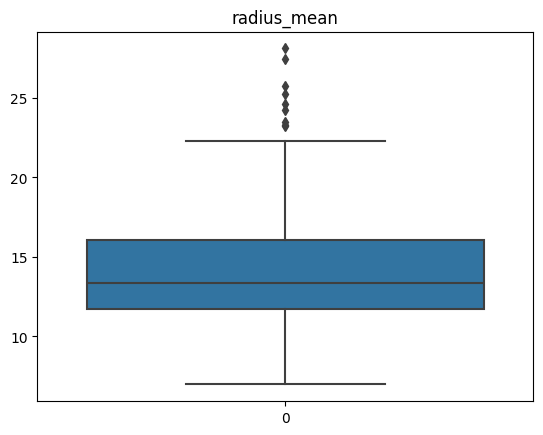

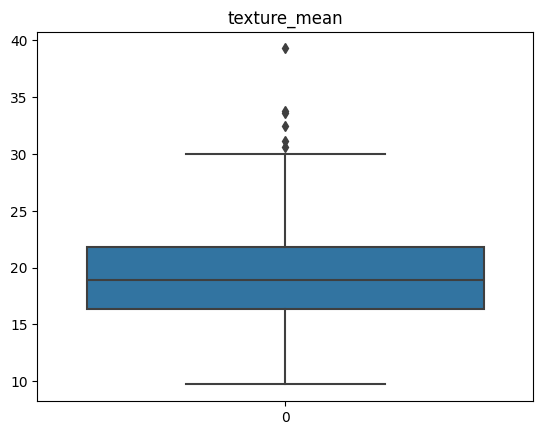

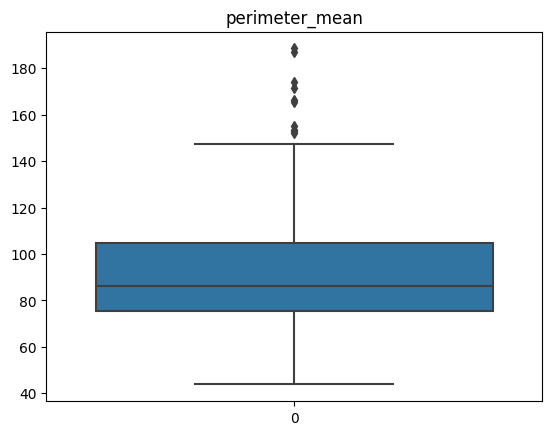

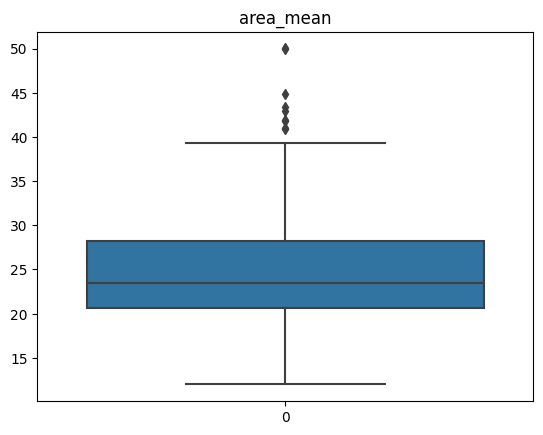

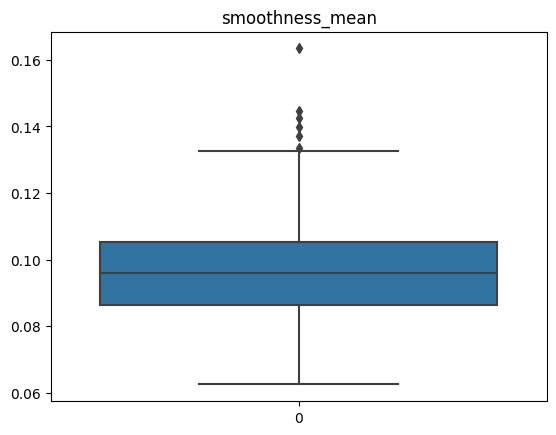

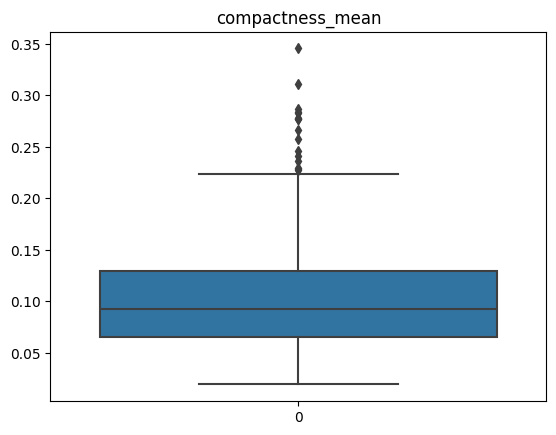

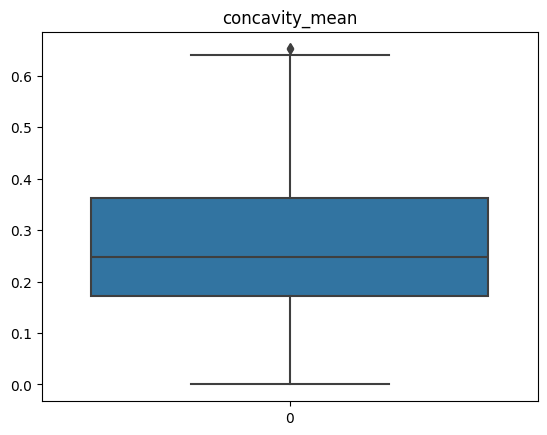

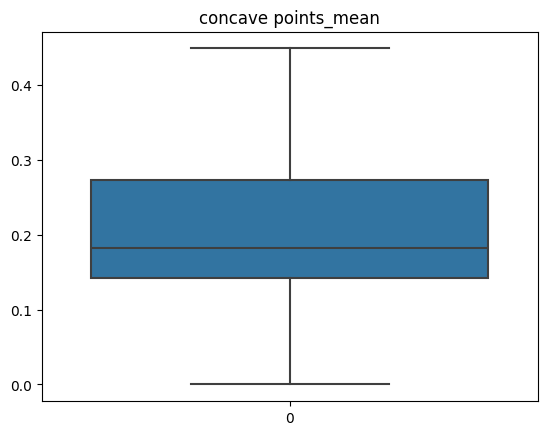

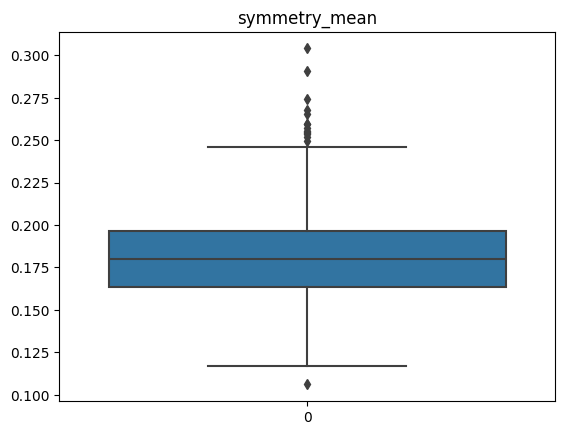

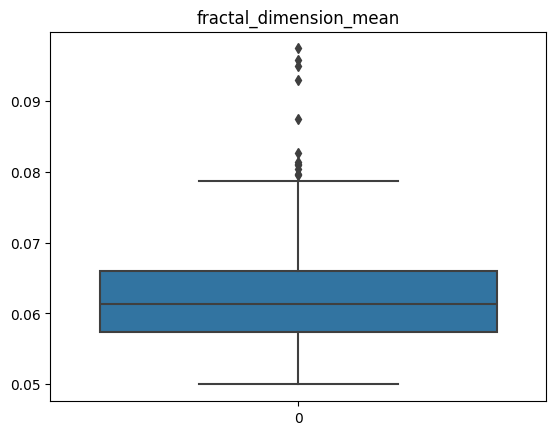

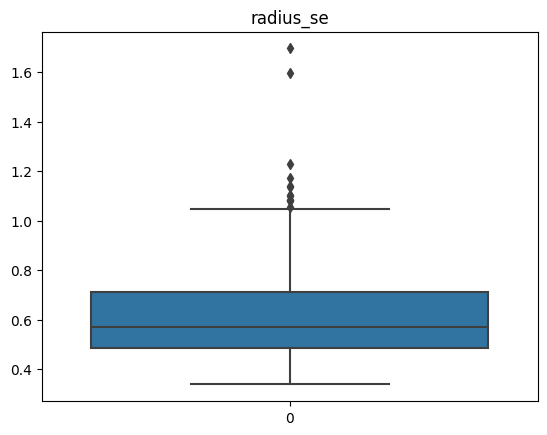

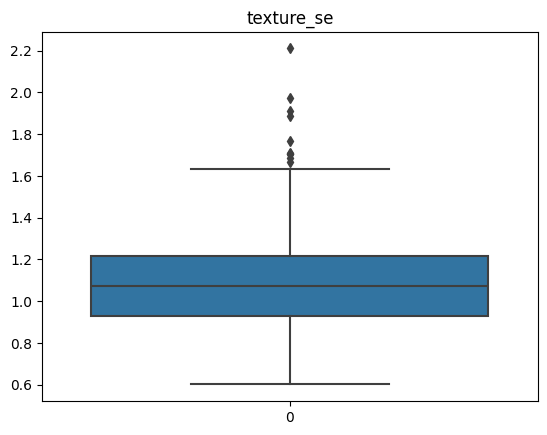

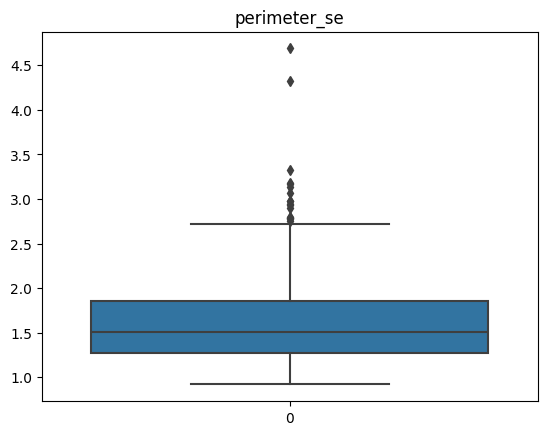

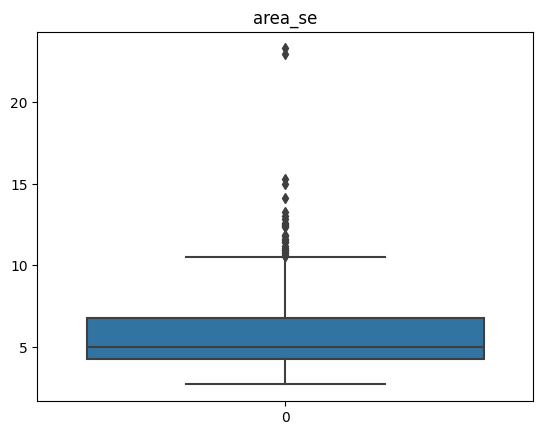

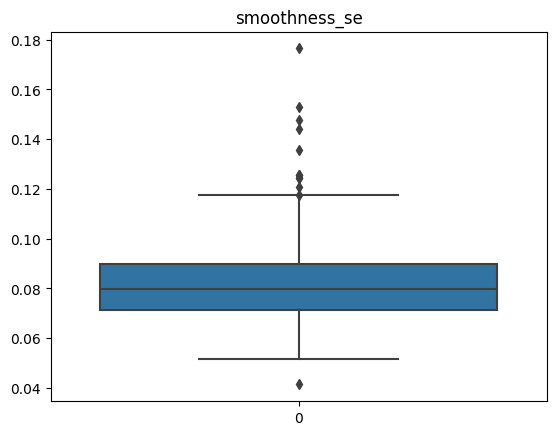

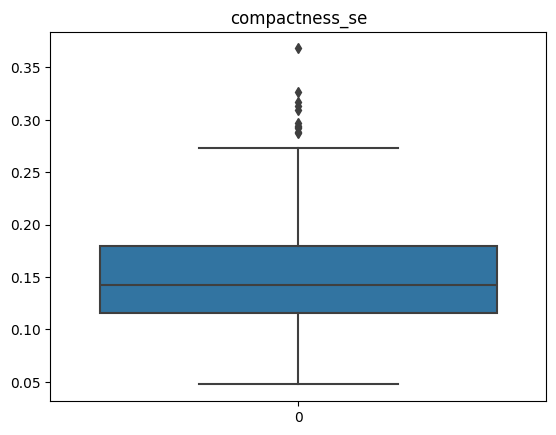

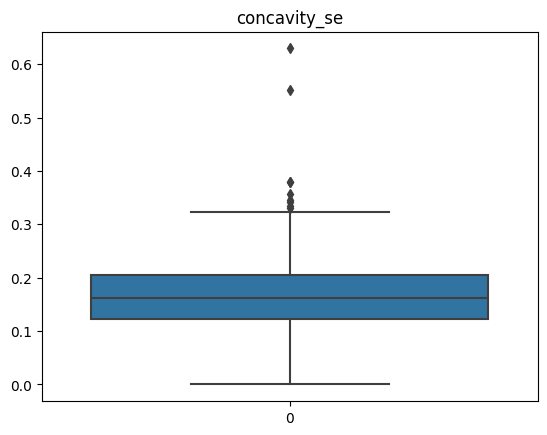

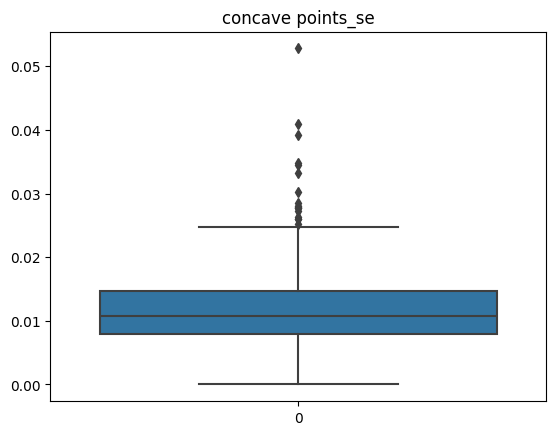

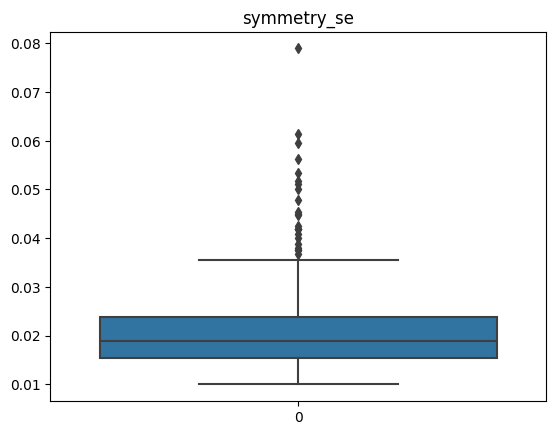

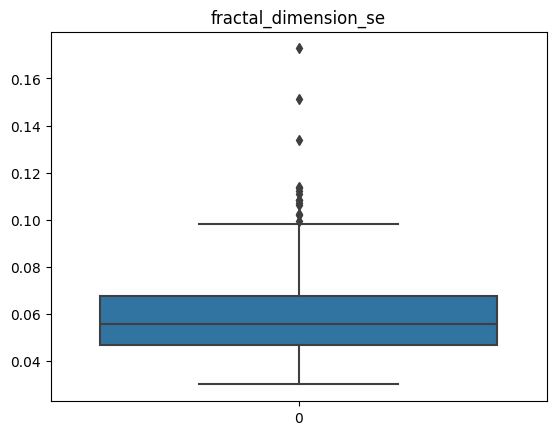

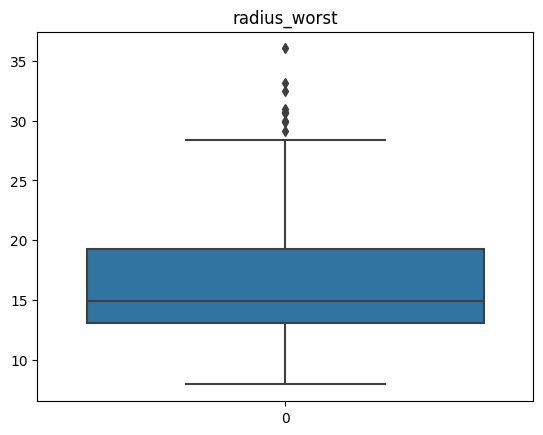

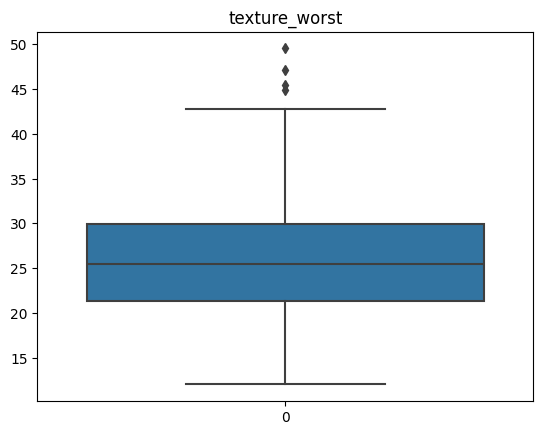

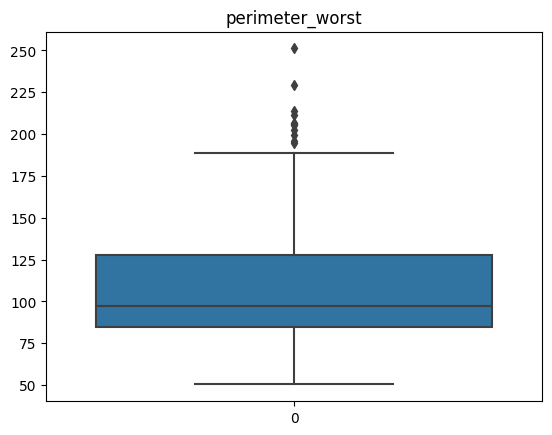

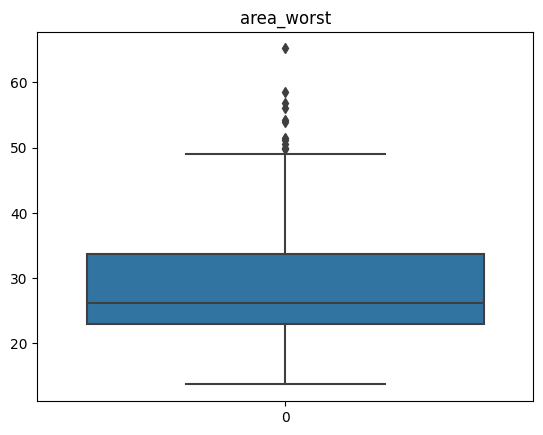

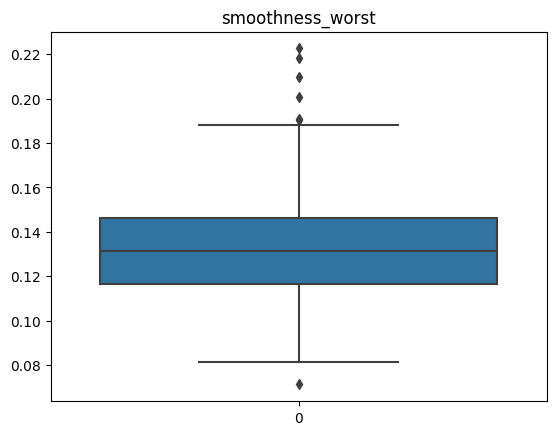

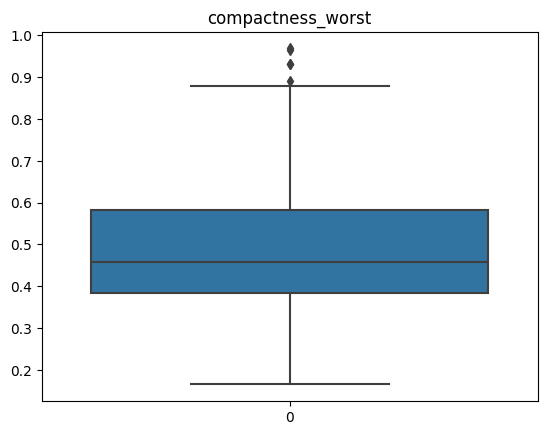

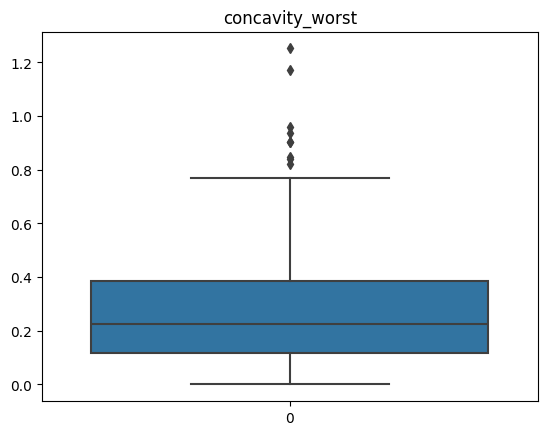

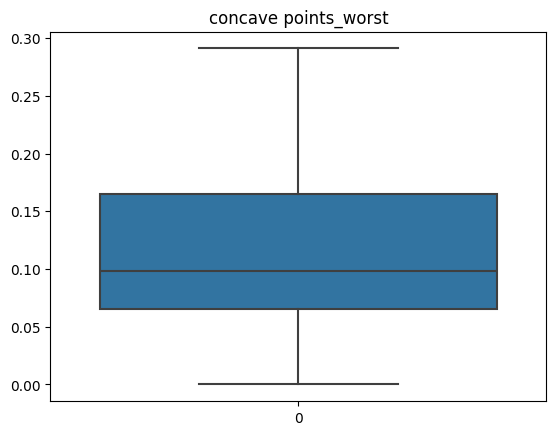

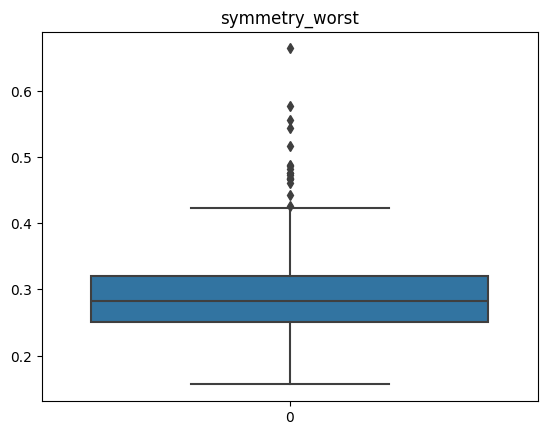

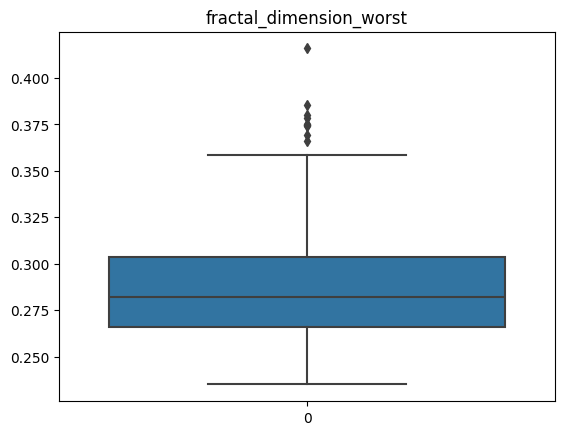

In [17]:
## plotting box plot to check if there any outliers or not
for i in X.columns:
    plt.figure()
    sns.boxplot(X_train[i]).set(title=i)

In [18]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

In [19]:
X_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.253337,1.473134,0.231331,0.294231,0.421157,-0.132209,0.632647,0.595741,-0.637204,0.268228,1.035716,0.607008,0.816183,0.785680,1.280220,0.087104,0.810048,0.890578,0.035452,0.628957,0.433931,1.192674,0.386624,0.436621,1.435709,0.022247,0.637744,0.570029,-0.431072,0.662085
1,0.017740,0.636344,0.166360,0.077638,0.597324,1.776034,1.476318,1.032573,0.442642,1.417683,1.199623,0.172490,1.365146,0.722782,0.930180,2.250662,1.395679,1.053379,-0.459121,1.113198,0.262640,0.589136,0.325138,0.270814,1.350045,2.091893,2.040779,0.964459,-0.134209,1.653759
2,1.820196,2.309925,1.962524,1.696596,1.506344,3.186256,2.473225,2.127895,2.044532,1.034531,1.270869,0.760564,1.533918,1.292667,-0.088479,1.905996,1.454451,0.759698,0.275673,1.139595,1.908258,2.201282,2.242929,1.629104,1.392877,3.051004,3.236245,2.281765,1.807906,2.185712
3,-0.813944,1.785474,-0.847683,-0.802030,-1.944410,-1.234478,-1.072746,-1.694037,0.156590,-0.892334,-1.440765,-0.606122,-1.208386,-1.137926,-1.363708,-0.456792,-0.529401,-1.397417,-0.651063,-0.777741,-0.877262,1.278894,-0.824951,-0.856523,-1.732562,-0.703629,-0.788086,-1.436692,-0.126396,-0.728455
4,1.533506,1.300648,1.452624,1.528268,0.477530,-0.113332,1.055045,1.111403,-0.579994,-1.221345,0.365264,0.372480,0.146477,0.607674,1.689426,-0.248690,0.808437,0.496344,-0.528597,-0.938172,1.031411,0.825020,0.931218,1.051176,0.870329,-0.356756,0.612525,0.478655,-0.995114,-1.386931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.677695,-0.503463,-0.703760,-0.660160,-0.391324,-0.786797,-0.759181,-0.869127,0.077926,-0.349535,-0.158137,-0.078189,-0.284782,-0.344863,-0.518189,-0.223954,-0.295337,-1.034626,-0.721716,-0.195993,-0.597894,-0.227511,-0.644005,-0.573286,-0.346095,-0.452322,-0.613494,-0.938248,-0.235767,-0.092201
451,-0.518739,-0.205108,-0.549556,-0.529282,-0.821171,-0.678902,-0.807491,-0.747641,-0.798108,-0.284288,-1.449288,-0.602259,-1.424011,-1.098066,-1.466874,-0.969755,-0.811462,-1.009088,-0.987843,-1.265047,-0.630521,0.260525,-0.656888,-0.617480,-0.603086,-0.264991,-0.376826,-0.468282,0.082971,-0.666242
452,-1.004124,1.351928,-1.001887,-1.003563,0.010336,-0.601358,-0.871036,-0.879447,0.256708,0.080816,-0.624114,0.584203,-0.820144,-0.699494,0.164389,-0.981351,-0.869364,-0.899437,0.080199,-0.439812,-0.842596,1.513151,-0.878825,-0.847259,0.746116,-0.734297,-0.770626,-0.819462,0.748571,-0.076742
453,-1.423373,-1.295966,-1.364162,-1.398177,-1.353899,-0.320609,-0.181184,-0.644096,1.844296,0.960955,0.131264,1.800530,-0.038616,-0.404654,0.709738,0.925737,0.610550,0.593705,2.475345,1.004891,-1.299372,-1.083200,-1.241595,-1.281251,-1.461436,-0.491800,-0.638713,-0.979213,0.550141,0.124944


In [20]:
X_scaled.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

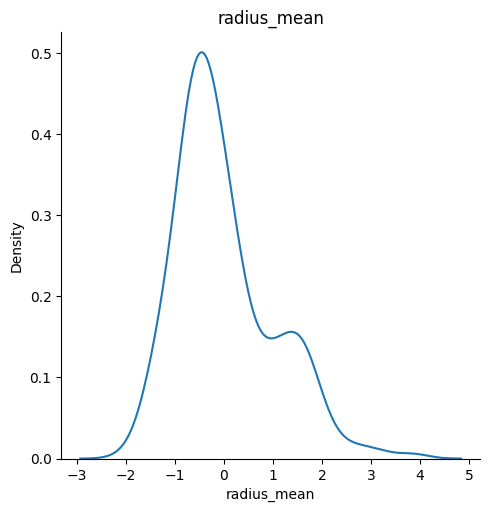

<Figure size 640x480 with 0 Axes>

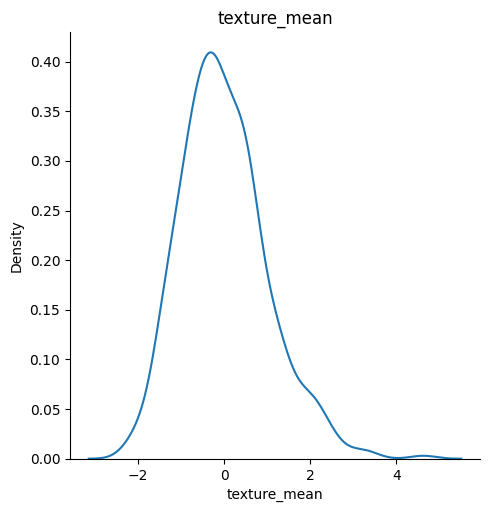

<Figure size 640x480 with 0 Axes>

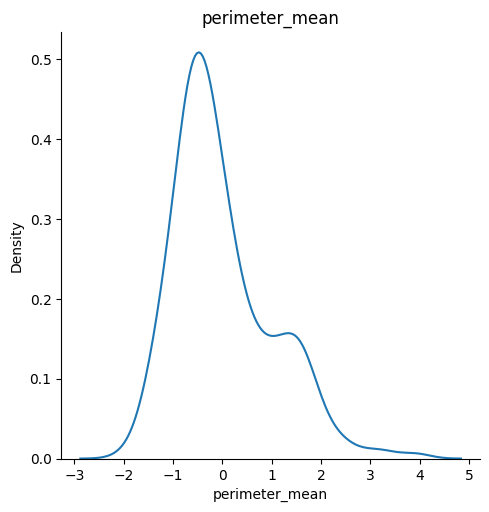

<Figure size 640x480 with 0 Axes>

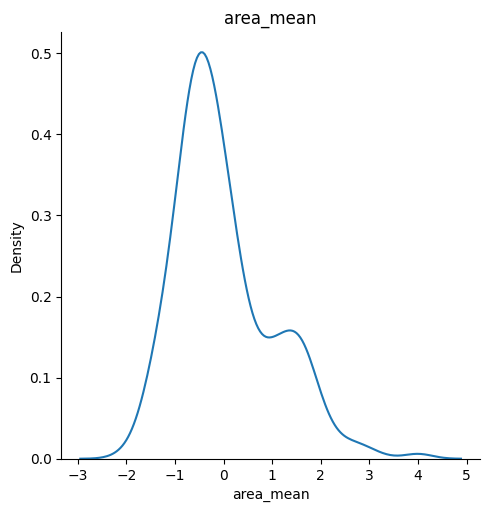

<Figure size 640x480 with 0 Axes>

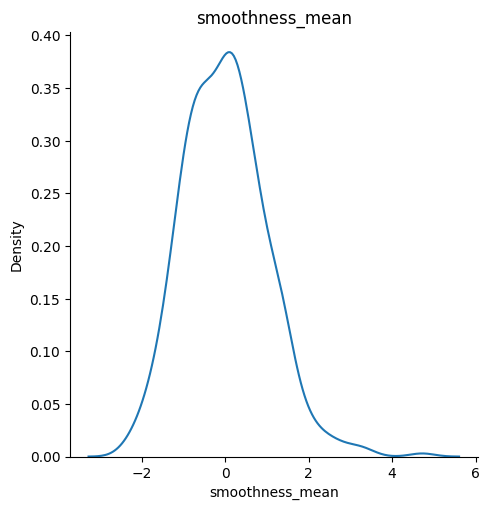

<Figure size 640x480 with 0 Axes>

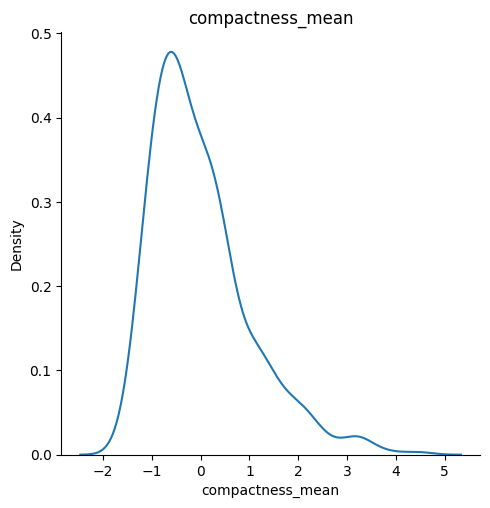

<Figure size 640x480 with 0 Axes>

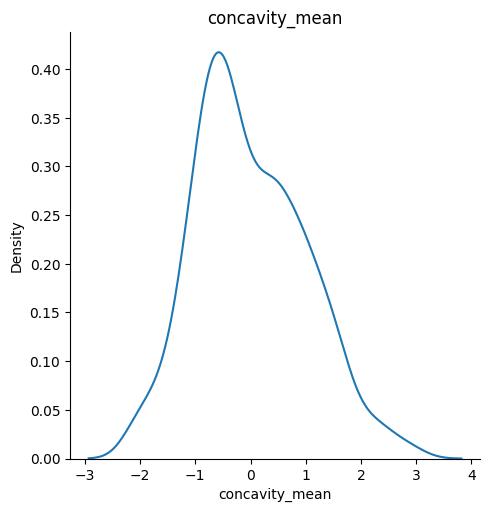

<Figure size 640x480 with 0 Axes>

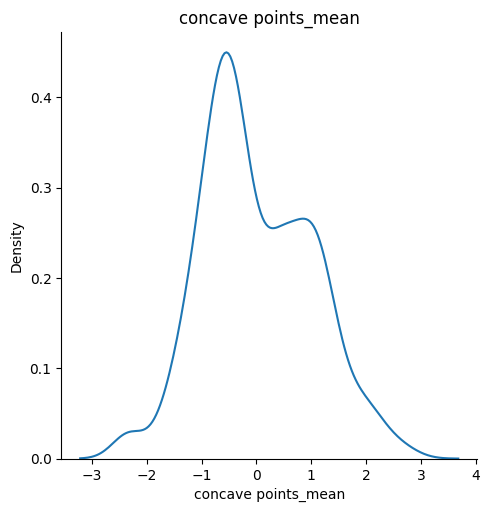

<Figure size 640x480 with 0 Axes>

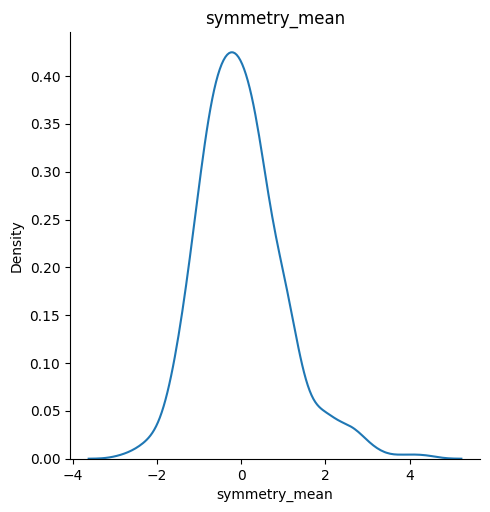

<Figure size 640x480 with 0 Axes>

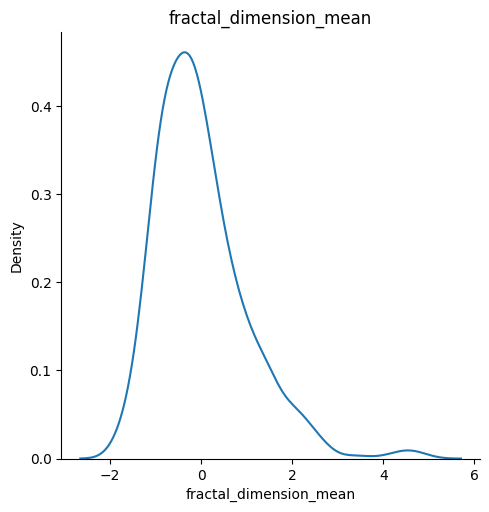

<Figure size 640x480 with 0 Axes>

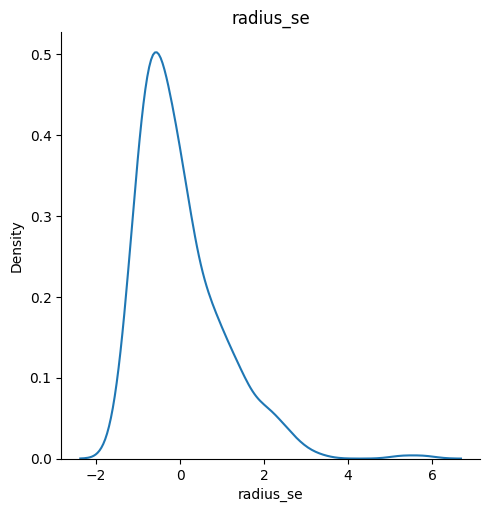

<Figure size 640x480 with 0 Axes>

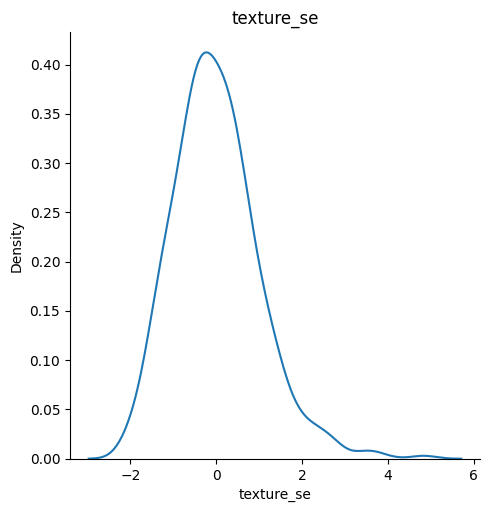

<Figure size 640x480 with 0 Axes>

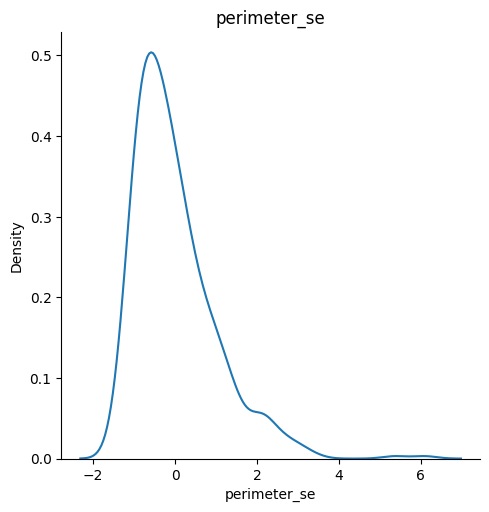

<Figure size 640x480 with 0 Axes>

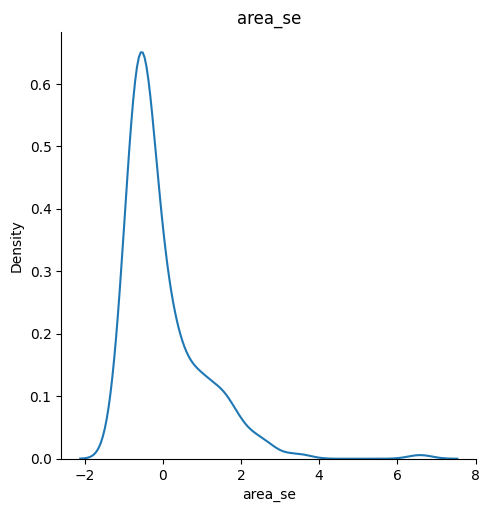

<Figure size 640x480 with 0 Axes>

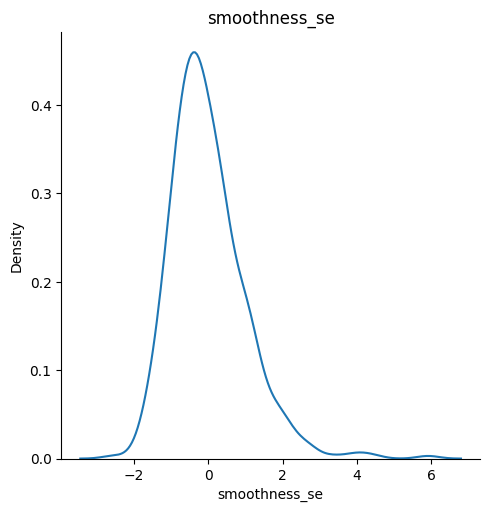

<Figure size 640x480 with 0 Axes>

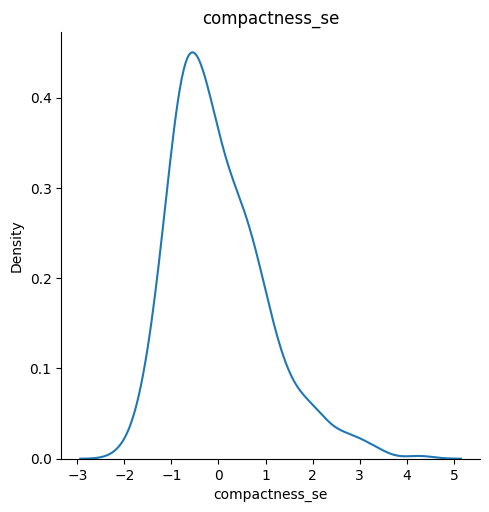

<Figure size 640x480 with 0 Axes>

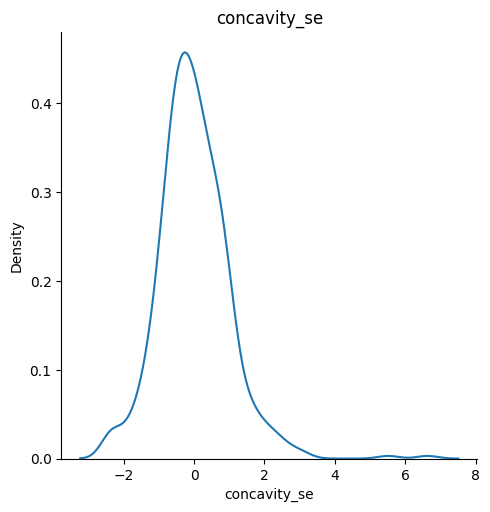

<Figure size 640x480 with 0 Axes>

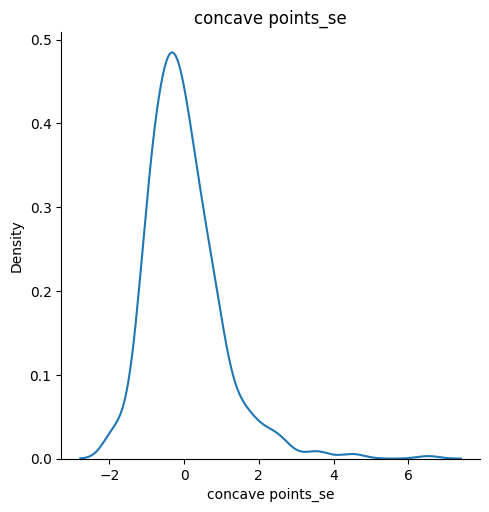

<Figure size 640x480 with 0 Axes>

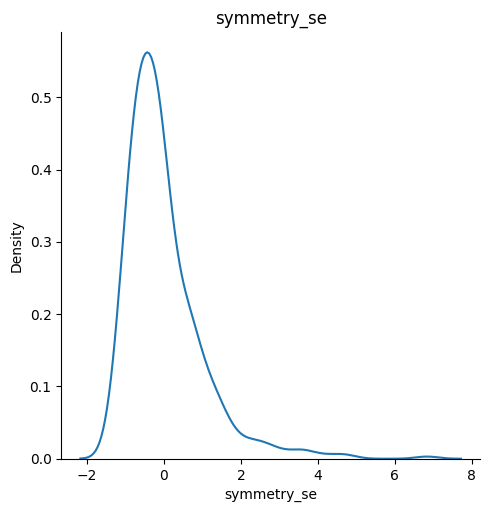

<Figure size 640x480 with 0 Axes>

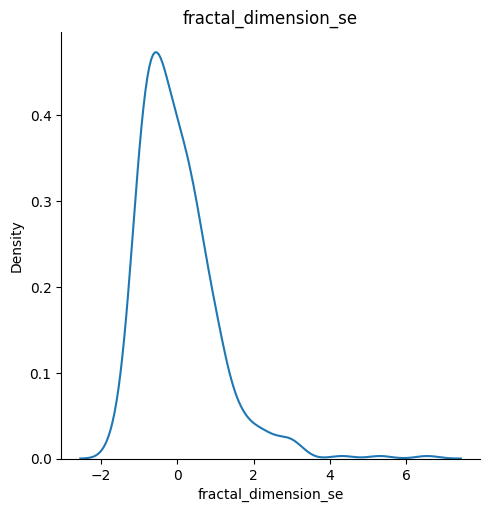

<Figure size 640x480 with 0 Axes>

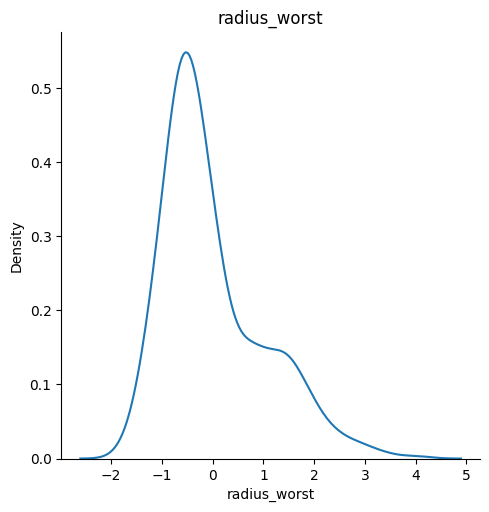

<Figure size 640x480 with 0 Axes>

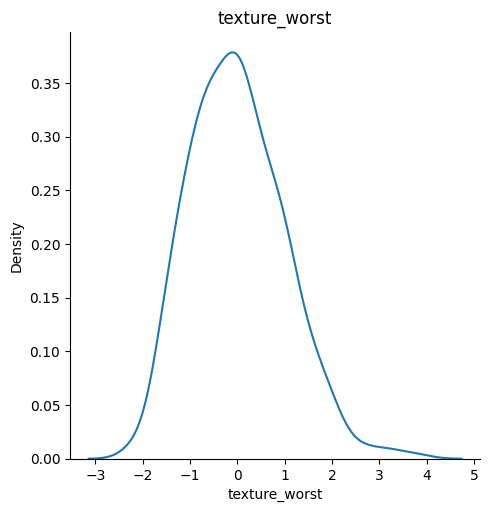

<Figure size 640x480 with 0 Axes>

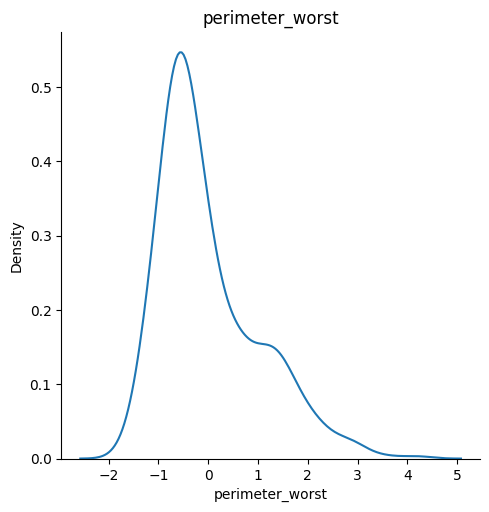

<Figure size 640x480 with 0 Axes>

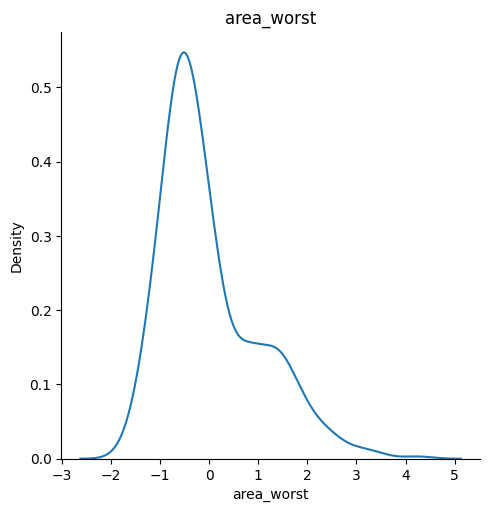

<Figure size 640x480 with 0 Axes>

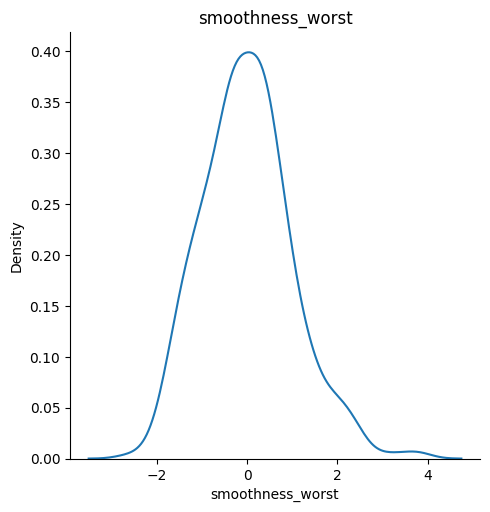

<Figure size 640x480 with 0 Axes>

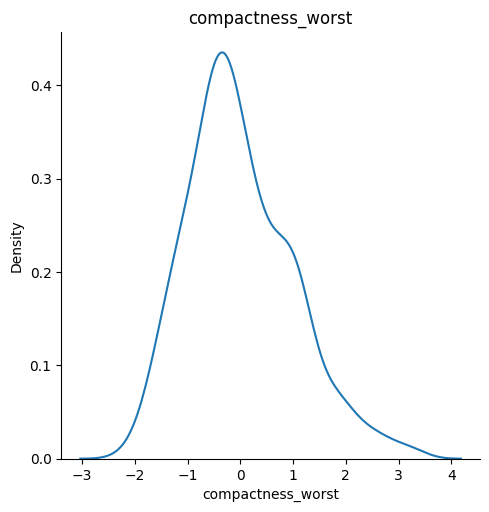

<Figure size 640x480 with 0 Axes>

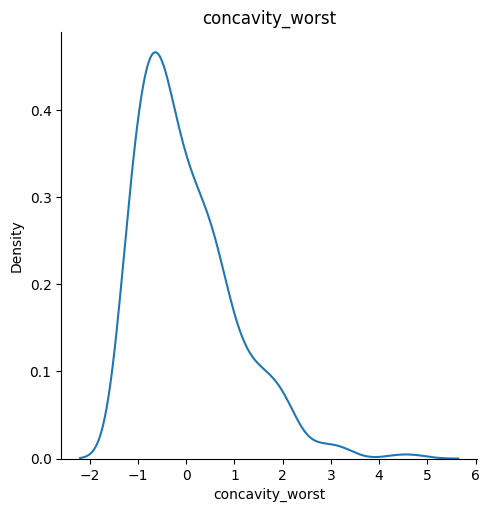

<Figure size 640x480 with 0 Axes>

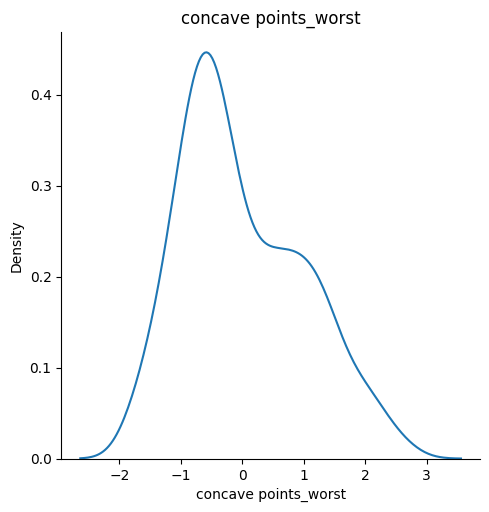

<Figure size 640x480 with 0 Axes>

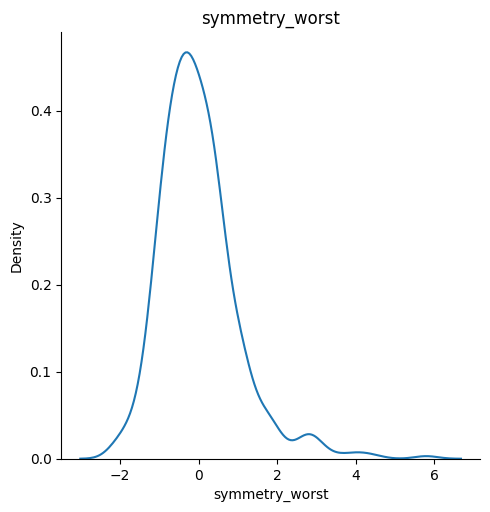

<Figure size 640x480 with 0 Axes>

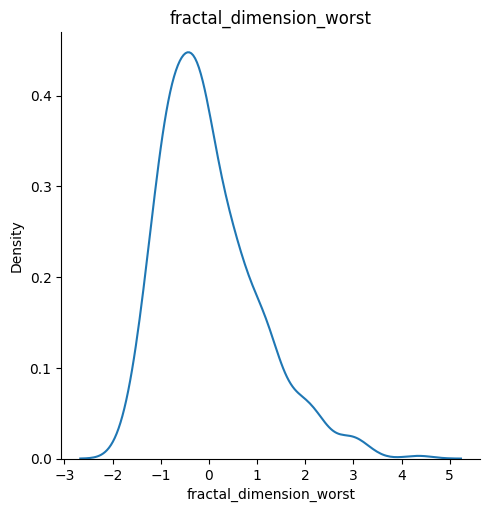

In [21]:
for i in X_scaled.columns:
    plt.figure()
    sns.displot(X_scaled[i],kind='kde').set(title=i)

### here dataset contains some outliers as seen in box plot but this outliers can be useful as this is cancer prediction dataset.


In [22]:
rf = RandomForestClassifier()
rf.fit(X_scaled,y_train)

RandomForestClassifier()

In [36]:
### preprocessing test data
### we need to apply exact same preprocessing as we applied on training data

## try to normalizing right skewed column using sqrt transformation
X_test = sqrt_transformation(X_test,right_skewed_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [37]:
X_test_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.178117,-1.286642,-0.155617,-0.196358,0.611417,0.265874,0.090696,0.080600,0.489125,0.044722,-0.585645,-1.633231,-0.431631,-0.505632,-0.356284,0.012203,-0.076783,-0.561864,-0.291909,-0.276381,-0.285900,-1.424825,-0.201888,-0.283393,0.219285,0.253213,-0.066441,-0.369598,0.211091,-0.058934
1,0.060318,1.764496,-0.005114,0.078892,-1.865488,-0.973531,-0.625486,-0.825516,-0.422665,-1.163039,-0.723906,-0.564276,-0.639175,-0.527040,-0.563842,-0.432325,-0.349506,-0.879486,-0.795902,-0.881346,-0.200254,0.990953,-0.222384,-0.178833,-1.318378,-0.678645,-0.602340,-0.906724,-0.913867,-1.134441
2,0.227790,1.347266,0.130174,0.240901,-0.179924,-0.990557,-0.866349,-0.385276,-0.930407,-1.064474,2.614088,1.689673,2.411481,1.679201,0.049906,-0.924962,-0.428853,1.163509,-1.532816,-0.974284,-0.283861,-0.112009,-0.364681,-0.256480,-1.653751,-1.734408,-1.199927,-1.312423,-2.132571,-1.800489
3,-0.195148,-1.564019,-0.274868,-0.179910,-1.597010,-1.271306,-1.646751,-1.573030,-1.645537,-1.299086,-0.763896,-1.105938,-0.810372,-0.532540,-1.530942,-1.780605,-1.710298,-1.378743,-0.718183,-1.106994,-0.287939,-1.455734,-0.366438,-0.256700,-1.809659,-1.632206,-1.249346,-1.417351,-1.035737,-1.317816
4,0.752915,0.009334,0.658989,0.756313,-1.548388,-0.603394,-0.316676,-0.428778,0.067199,-1.392097,0.410221,1.500982,0.461112,0.351997,-1.474353,0.229266,0.141816,-0.124535,-0.671081,-1.141400,0.374795,0.354879,0.360273,0.404230,-1.916310,-0.465420,-0.403500,-0.469195,-0.629503,-1.469102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.359790,0.526792,-1.341546,-1.359486,-1.179142,-0.819924,-0.573470,-1.514271,-1.970921,0.629168,-1.459411,0.005548,-1.099695,-1.262426,-0.496164,0.237114,0.405124,-1.077720,-0.163555,0.510163,-1.308549,0.341865,-1.211730,-1.311478,-1.022838,-0.323767,-0.410289,-1.363440,-0.865431,0.533224
110,-0.887745,-1.069869,-0.907308,-0.872941,-1.339806,-1.057737,-0.791413,-1.359625,-1.037677,-0.078830,-0.995214,-1.101533,-1.019188,-0.881802,-1.061140,-0.597458,-0.365327,-1.230945,-1.058497,0.037226,-0.754911,-0.901000,-0.796550,-0.738149,-0.877210,-0.330022,-0.307959,-0.907790,-0.531069,0.506361
111,-0.280303,-0.839111,-0.341484,-0.277980,-0.797212,-0.968349,-1.755750,-1.680264,-0.690839,-0.523064,-0.965437,-1.411815,-1.072227,-0.753910,-1.374627,-1.239143,-1.874013,-1.515368,-0.878331,-0.458975,-0.402133,-0.884732,-0.468330,-0.395585,-0.842945,-0.781931,-1.261907,-1.373187,-0.435760,0.063643
112,0.361201,-1.755152,0.416376,0.354250,2.063031,0.937673,1.390274,1.456572,0.503428,1.108108,0.177579,-1.179559,0.080952,0.296194,-0.548005,0.016737,0.607455,0.210644,-0.350786,0.329743,0.491028,-1.439466,0.497886,0.528667,0.883178,0.790376,1.511185,1.028421,0.447020,1.021317


In [38]:
y_pred = rf.predict(X_test_scaled)

In [39]:
accuracy_score(y_test,y_pred)

0.9473684210526315

In [40]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



[[69  3]
 [ 3 39]]


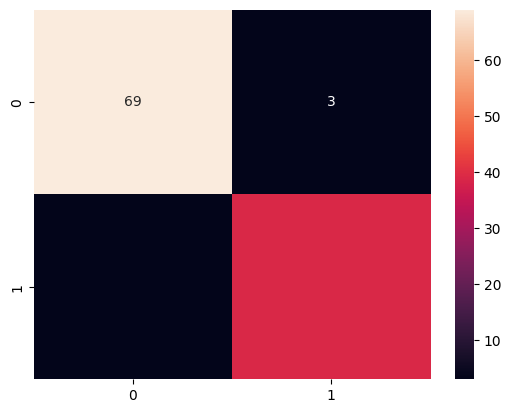

In [41]:
# confusion metrics
confusion_met = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_met,annot=True)
print(confusion_met)

In [42]:
## trying neural network

In [43]:
model = Sequential([
                    Dense(units=45,activation='relu',kernel_initializer='he_normal',input_shape=(30,)),
                    Dense(units=32,activation='relu',kernel_initializer='he_normal'),
                    Dense(units=1,activation='sigmoid',kernel_initializer='he_normal')
            ])

In [44]:
model.compile(optimizer=Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
model.fit(X_scaled,y_train,epochs=50)

Epoch 1/50
15/15 [==============================] - 0s 2ms/step - loss: 1.3583e-04 - accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 1.3152e-04 - accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 1.2476e-04 - accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 1.1940e-04 - accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 1.1484e-04 - accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 1.1691e-04 - accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0956e-04 - accuracy: 1.0000
Epoch 8/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0314e-04 - accuracy: 1.0000
Epoch 9/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0048e-04 - accuracy: 1.0000
Epoch 10/50
15/15 [==============================] - 0s 1ms/step - loss: 9.5420e-0

In [59]:
y_pred_nn = model.predict(X_test_scaled)

4/4 [==============================] - 0s 1ms/step


In [61]:
y_pred_nn = np.where(y_pred_nn>0.5,1,0)

In [62]:
y_pred_nn

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [63]:
accuracy_score(y_test,y_pred_nn)

0.9912280701754386

# wow, Neural network performing well on test data 